<h1><b>Car Price Prediction with Linear Regression</b></h1>

<h3>Description of Notebook</h3>

Install / Import Needed Packages

In [6]:
#pip install pandas

In [7]:
#pip install numpy

In [8]:
#pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Load the Dataset</h3>

In [11]:
df = pd.read_csv('insurance.csv')

Show the first five rows

In [12]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3>Clean data</h3>
Lets see the unique responses for the three columns: sex, smoker, and region.

In [16]:
#print('Unique Sex Options:', df['sex'].unique())
#print('Unique Smoker Options:', df['smoker'].unique())
#print('Unique Region Options:', df['region'].unique())

Unique Sex Options: ['female' 'male']
Unique Smoker Options: ['yes' 'no']
Unique Region Options: ['southwest' 'southeast' 'northwest' 'northeast']


With the unique responses above, lets convert these to numerical data. 0 or 1 for binary options, then 0 to n for non-binary options.

In [24]:
#df['sex']    = pd.factorize(df['sex'])[0]
#df['smoker'] = pd.factorize(df['smoker'])[0]
#df['region'] = pd.factorize(df['region'])[0]

Done! Lets display the updated dataframe.

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Lets normalize the bmi column.

In [47]:
#minBMI = min(df['bmi'])
#maxBMI = max(df['bmi'])

#df['bmi'] = (df['bmi']-minBMI)/(maxBMI-minBMI)

<h3>Find correlations</h3>

In [48]:
correlations = df.corr()
important_features = correlations['charges'].sort_values(ascending=False)

print('Descending Correlation to Medical Cost:')
print()
print(important_features)

Descending Correlation to Medical Cost:

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64


<h3>Scatter Plot of Correlation</h3>
Enter one of the column names above into the columnOfInterest string and run the cell to see the scatter plot

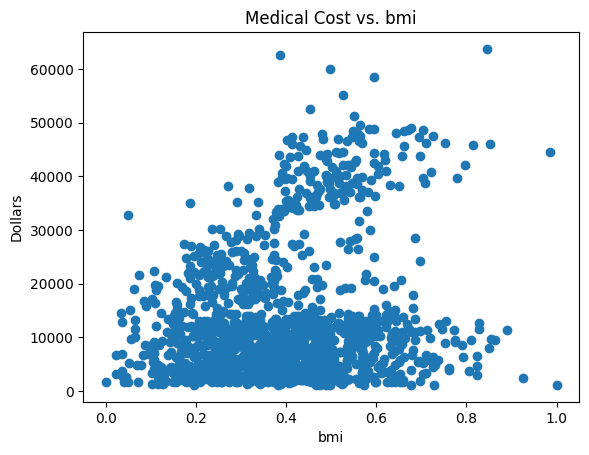

In [49]:
columnOfInterest = 'bmi'

plt.scatter(df[columnOfInterest],df['charges'])
plt.title('Medical Cost vs. ' + columnOfInterest)
plt.xlabel(columnOfInterest)
plt.ylabel('Dollars')
plt.show()

<h3>Data formatting</h3>

In [ ]:
# Top  correlated features of dataset
X = df[['']]
X = X.to_numpy()

# Target Features
y = df[['']]
y = y.to_numpy()

Split into train and test

In [ ]:
# Set test size.. between 0-1
test_size = 0.75

split_index = int(len(X) * test_size)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

<h3>Compute Cost</h3>

In [7]:
def compute_cost(X,y,w,b,lambda_=1):
    
    m,n = X.shape
    cost = 0
    
    for i in range(m):
        f_wb_i = np.dot(X[i],w)+b
        cost += (f_wb_i - y[i])**2

    cost = cost/(2*m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/2*m) * reg_cost

    total_cost = reg_cost + cost
    
    return total_cost

<h3>Test Initial Model Parameters Set to Zero</h3>

In [ ]:
# Size of examples and features
m,n = X.shape

# Set the initial parameters
w_initial = np.zeros(n)
b_initial = 0.

cost = compute_cost(X,y,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

<h3>Test Model With Non-Zeros</h3>

In [ ]:
# Set the initial parameters
w_initial = np.array([])
b_initial = 

cost = compute_cost(X,y,w_initial,b_initial)
cost = float(cost)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

<h3>Compute Gradient</h3>

In [ ]:
def compute_gradient(X,y,w,b,lambda_=1):
    # Args: X - Data, y - Target Values, w - slope values, b - intercept value, lambda_ - regularization
    
    m = X.shape[0]
    n = len(w)
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    if n == 1:
        for i in range(m):
            err_i = (np.dot(X[i],w)+b) - y[i]
            dj_dw = dj_dw + err_i * X[i]
            dj_db = dj_db + err_i
    
        dj_dw = dj_dw / m
        dj_db = dj_db / m

    else:
        for i in range(m):
            err_i = (np.dot(X[i],w)+b) - y[i]
            for j in range(n):
                dj_dw[j] = dj_dw[j] + err_i * X[i,j]
            dj_db = dj_db + err_i
    
        dj_dw = dj_dw / m
        dj_db = dj_db / m
    
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (lambda_/m)* w[j]

    return dj_db, dj_dw

<h3>Run Gradient with Zeros</h3>

In [ ]:
w_initial = np.array([])
b_initial = 0

dj_db, dj_dw = compute_gradient(X,y,w_initial,b_initial)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

<h3>Run Gradient with Non-Zeros</h3>

In [ ]:
w_initial = np.array([])
b_initial = 

dj_db, dj_dw = compute_gradient(X,y,w_initial,b_initial)
print('dj_db at initial w and b:', dj_db)
print('dj_dw at initial w and b:', dj_dw)

<h3>Define Gradient Descent</h3>

In [ ]:
def gradient_descent(X,y,w_in,b_in,compute_cost,compute_gradient, alpha,num_iters):

    m = len(X)

    J_hist = []
    w_hist = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X,y,w_in,b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = compute_cost(X,y,w_in,b_in)
            J_hist.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}    ")
    return w_in, b_in, J_hist, w_hist

<h3>Run Gradient Descent</h3>

In [ ]:
w_init = np.array([])
b_init = 

iterations = 1000
alpha = 0.000001

w,b,J_hist,w_hist = gradient_descent(X_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.plot(J_hist)
ax1.set_title('Total Cost of Model')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')

ax2.plot(w_hist)
ax2.set_title('Weight Change Over Time')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')

<h3>Repeat as Needed</h3>

In [ ]:
w_init = np.array([])
b_init = 

iterations = 1000
alpha = 0.0000001

w,b,J_hist,w_hist = gradient_descent(X_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

ax1.plot(J_hist)
ax1.set_title('Total Cost of Model')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')

ax2.plot(w_hist)
ax2.set_title('Weight Change Over Time')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')

plt.show()

<h3>Compute Accuracy of Model on Test Data</h3>

In [ ]:
def predict(X,w,b):
    # Args: X - Data, w - slope weights, b - intercept, threshold - value to set prediction to a 1
    
    m,n = X.shape
    p = np.zeros(m)
    
    for i in range(m):
        p.append(np.dot(X[i],w)+b)
        
    return p

In [ ]:
pred = predict(X_test,w,b)